# Demo on the BAShapes dataset

This notebook contains visualizations of GAtt scores on the BAShape dataset.

In [1]:
import os

# Set proper working directory
os.chdir("/workspace/")

### Visualizations

- Visualize the GAtt scores on the BAShapes dataset
- Nodes in the house-shaped graphs have indices from 600~700

First import necessary libraries:

In [2]:
from torch_geometric.data import Data
from torch_geometric.utils import add_self_loops
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.utils import get_num_hops, k_hop_subgraph
from typing import Tuple, Dict, List
from src.attention_analysis_utils import return_edges_in_k_hop

from gatt import get_gatt, get_avgatt
from vis_utils import (
    draw_local_comp_graph_with_ground_truth_house_BAShapes,
    draw_local_comp_graph_with_attribution_scores_BAShapes,
)

## 2-layer GAT
### Data and Model Preparation

In [3]:
dataset_name = "BAShapes"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = torch.load(f"/workspace/Data/BAShapes.pt", map_location=device)
model_l2 = torch.load(
    f"/workspace/Models/GAT_{dataset_name}_2L1H.pt", map_location=device
)

num_hops_l2 = 2

with torch.no_grad():
    _ = model_l2(data.x, data.edge_index, return_att=True)
    att_l2 = list(model_l2.att)

#### Ground Truth Explanation

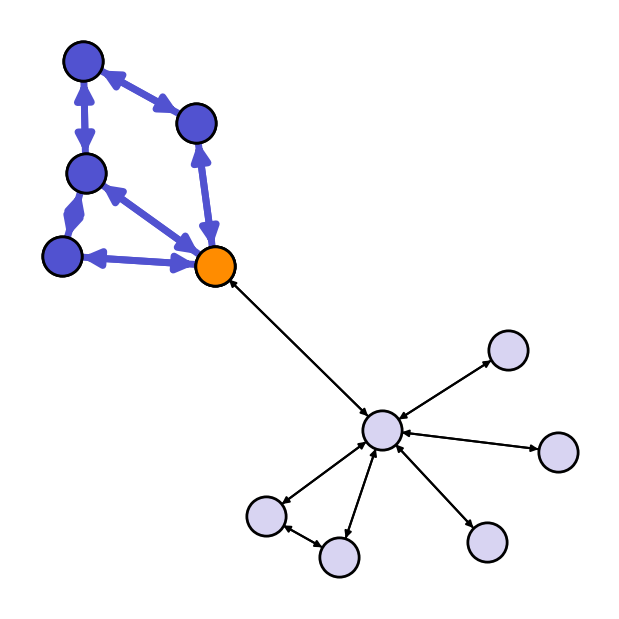

In [4]:
target_node = 600
gatt_val_l2, edge_index_l2 = get_gatt(
    target_node=target_node, model=model_l2, data=data, sparse=True
)
edge_index_l2 = torch.Tensor(edge_index_l2).long().t()
att_matrix_l2 = torch.zeros((data.num_nodes, data.num_nodes)).to(device)
att_matrix_l2[edge_index_l2[1], edge_index_l2[0]] = torch.tensor(gatt_val_l2).to(device)

draw_local_comp_graph_with_ground_truth_house_BAShapes(
    data=data, target_idx=target_node, num_hops=num_hops_l2
)

#### GAtt scores for target node as heatmap (2 layer GAT)

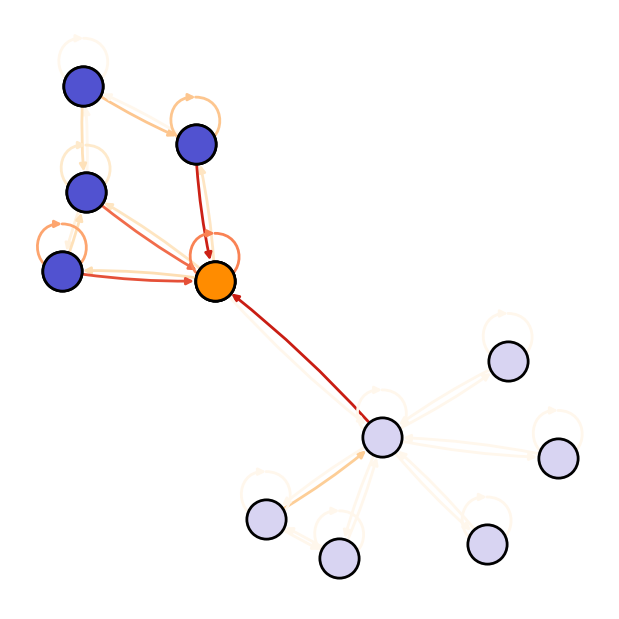

In [5]:
draw_local_comp_graph_with_attribution_scores_BAShapes(
    data=data,
    hops=num_hops_l2,
    target_idx=target_node,
    att_matrix=att_matrix_l2,
)

#### AvgAtt scores (naive averaging) for target node as heatmap (2 layer GAT)

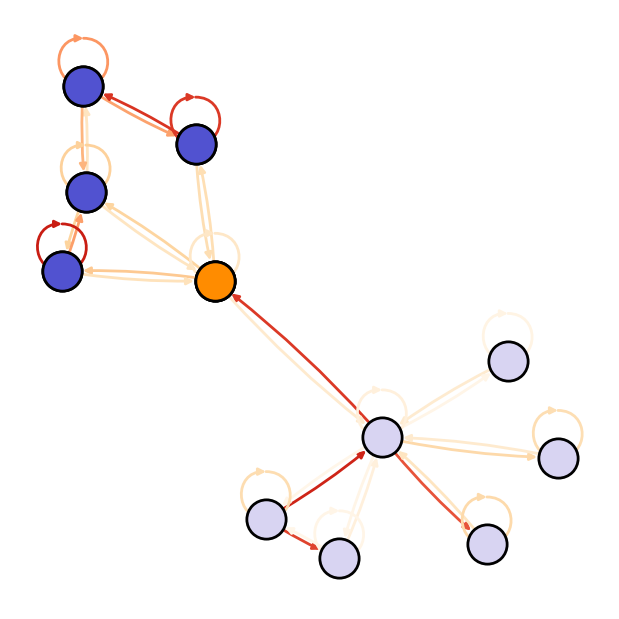

In [6]:
avgatt_value_l2, edges_in_k_hop = get_avgatt(
    target_node=target_node, model=model_l2, data=data, sparse=True
)
avgatt_matrix_l2 = torch.zeros((data.num_nodes, data.num_nodes)).to(device)
edge_index_l2 = torch.Tensor(edges_in_k_hop).long().t()
avgatt_matrix_l2[edge_index_l2[1], edge_index_l2[0]] = torch.tensor(avgatt_value_l2).to(
    device
)

draw_local_comp_graph_with_attribution_scores_BAShapes(
    data=data,
    hops=num_hops_l2,
    target_idx=target_node,
    att_matrix=avgatt_matrix_l2,
)

## 3-layer GAT
### Data and Model Preparation

In [7]:
dataset_name = "BAShapes"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = torch.load(f"/workspace/Data/BAShapes.pt", map_location=device)
model_l3 = torch.load(
    f"/workspace/Models/GAT_{dataset_name}_3L1H.pt", map_location=device
)

num_hops_l3 = get_num_hops(model=model_l3)

with torch.no_grad():
    _ = model_l3(data.x, data.edge_index, return_att=True)
    att_l3 = list(model_l3.att)

#### Ground Truth Explanation

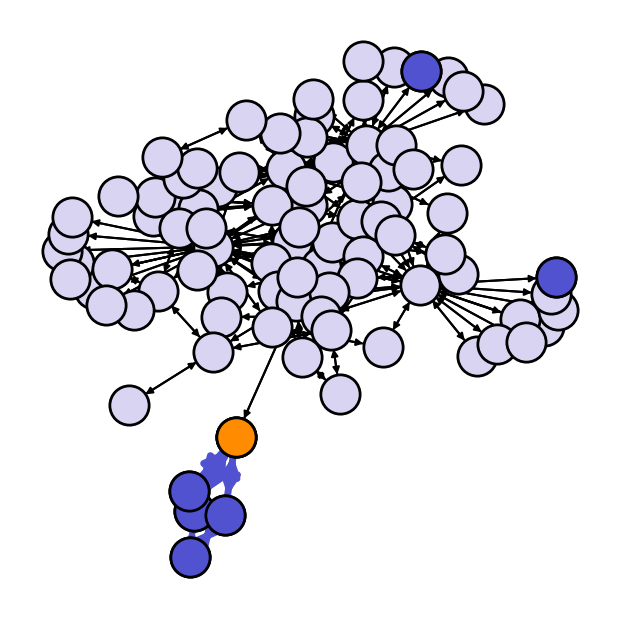

In [8]:
target_node = 600
gat_val_l3, edge_index_l3 = get_gatt(
    target_node=target_node, model=model_l2, data=data, sparse=True
)
edge_index_l3 = torch.Tensor(edge_index_l3).long().t()
att_matrix_l3 = torch.zeros((data.num_nodes, data.num_nodes)).to(device)
att_matrix_l3[edge_index_l3[1], edge_index_l3[0]] = torch.tensor(gat_val_l3).to(device)

draw_local_comp_graph_with_ground_truth_house_BAShapes(
    data=data, target_idx=target_node, num_hops=num_hops_l3
)

#### GAtt scores for target node as heatmap (3 layer GAT)

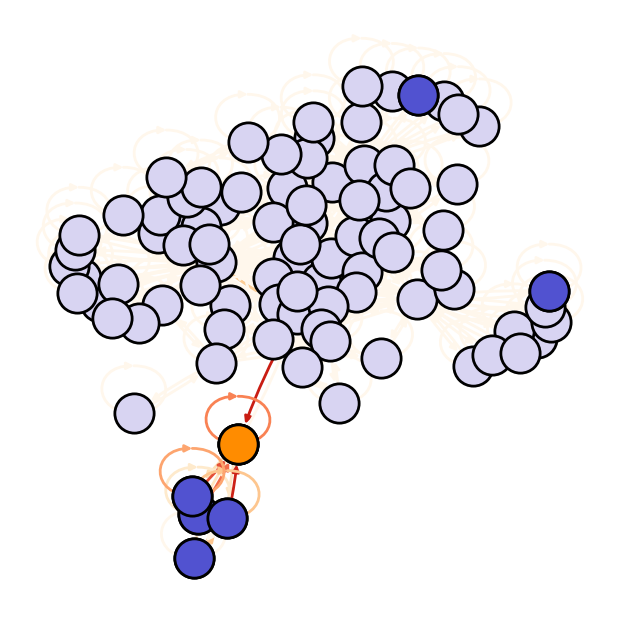

In [9]:
draw_local_comp_graph_with_attribution_scores_BAShapes(
    data=data,
    hops=num_hops_l3,
    target_idx=target_node,
    att_matrix=att_matrix_l3,
)

#### AvgAtt scores (naive averaging) for target node as heatmap (3 layer GAT)

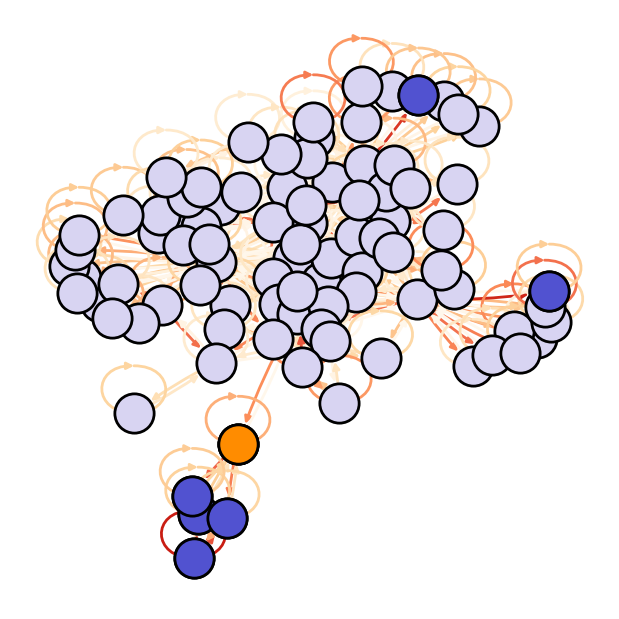

In [10]:
avgatt_value_l3, edges_in_k_hop = get_avgatt(
    target_node=target_node, model=model_l3, data=data, sparse=True
)
avgatt_matrix_l3 = torch.zeros((data.num_nodes, data.num_nodes)).to(device)
edge_index_l3 = torch.Tensor(edges_in_k_hop).long().t()
avgatt_matrix_l3[edge_index_l3[1], edge_index_l3[0]] = torch.tensor(avgatt_value_l3).to(
    device
)

draw_local_comp_graph_with_attribution_scores_BAShapes(
    data=data,
    hops=num_hops_l3,
    target_idx=target_node,
    att_matrix=avgatt_matrix_l3,
)